# Python Invest - homework-1-intro-and-data-sources

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.




In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [2]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


### Question 1: [Macro] Average growth of GDP in 2023
**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7##

**Answer: 2.5**

In [3]:
gdpc1 = pdr.DataReader("gdpc1", "fred", start=start)
# gdpc1.tail()

gdpc1['gdpc1_us_yoy'] = (gdpc1.gdpc1 / gdpc1.gdpc1.shift(4)-1) * 100
gdpc1_2023 = gdpc1.loc['2023-01-01':'2023-12-31']
# gdpc1_2023

# AVG gdpc1_us_yoy for year 2023
gdpc1_2023['gdpc1_us_yoy'].mean().round(1)

2.5

### Question 2. [Macro] Inverse "Treasury Yield"
**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

**Answer: -1.1**

In [4]:
start = date(2000, 1, 1)
end = date.today()
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2000-01-01 to 2024-04-21 


In [5]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start, end=end)
dgs2 = pdr.DataReader("DGS2", "fred", start=start, end=end)

# Join the two dataframes on the date index and add diff
joined_df = dgs10.join(dgs2)
joined_df['diff'] = joined_df.DGS10 - joined_df.DGS2

joined_df

,DGS10,DGS2,diff
DATE,,,
2000-01-03,6.58,6.38,0.20
2000-01-04,6.49,6.30,0.19
2000-01-05,6.62,6.38,0.24
2000-01-06,6.57,6.35,0.22
2000-01-07,6.52,6.31,0.21
...,...,...,...
2024-04-12,4.50,4.88,-0.38
2024-04-15,4.63,4.93,-0.30
2024-04-16,4.67,4.97,-0.30


In [6]:
# min value of (dgs10-dgs2) after since year 2000 (2000-01-01)
joined_df['diff'].min().round(1)

-1.1

An inverted yield curve occurs when short-term debt instruments have higher yields than long-term instruments of the same credit risk profile. An inverted yield curve is unusual; it reflects bond investors' expectations for a decline in longer-term interest rates, typically associated with recessions.

In [7]:
# Create a line chart with plotly
fig = go.Figure()

# Add traces for DGS2 and DGS10
fig.add_trace(go.Scatter(x=joined_df.index, y=joined_df['DGS2'], name='DGS2'))
fig.add_trace(go.Scatter(x=joined_df.index, y=joined_df['DGS10'], name='DGS10'))

# Set the title and axes labels
fig.update_layout(title='Yield Curve', xaxis_title='Date', yaxis_title='Yield (%)')

# Show the figure
fig.show()


### Question 3. [Index] Which Index is better recently?
**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

**Answer: 81%**

In [8]:
start = date(2019, 4, 9)
end = date(2024, 4, 9)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2019-04-09 to 2024-04-09 


In [9]:
gspc_daily = yf.download(tickers = "^GSPC", start=start, end=end, period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [10]:
gspc_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000


In [11]:
mxx_daily = yf.download(tickers = "^MXX", start=start, end=end, period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [12]:
mxx_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700
2024-04-05,57805.191406,58227.839844,57678.609375,58092.441406,58092.441406,212252300
2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800


In [13]:
gspc_growth = (gspc_daily['Adj Close'][-1] / gspc_daily['Adj Close'][0] - 1) * 100
mxx_growth = (mxx_daily['Adj Close'][-1] / mxx_daily['Adj Close'][0] - 1) * 100

print("S&P 500 growth:", gspc_growth.round(0))
print("IPC Mexico growth:", mxx_growth.round(0))

if gspc_growth > mxx_growth:
  print(f"S&P 500 grew more with {round(gspc_growth)}%")
else:
  print(f"IPC Mexico grew more with {round(mxx_growth)}%")

S&P 500 growth: 81.0
IPC Mexico growth: 28.0
S&P 500 grew more with 81%


### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

**Answer:**

|           |   max	        |   min	        |   ratio
|-----------|---------------|---------------|---------
|   MSFT	|   381.993622	|   219.949371	|   0.42
|   GOOG	|   142.820007	|   86.769997	|   0.39
|   AAPL	|   197.857529	|   124.166641	|   0.37
|   JPM	    |   168.274734	|   120.737251	|   0.28
|   2222.SR	|   34.660252	|   27.245359	|   0.21
|   BRK-B	|   370.480011	|   293.510010	|   0.21

In [14]:
start = date(2023, 1, 1)
end = date(2023, 12, 31)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2023-01-01 to 2023-12-31 


In [15]:
companies = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
top_6 = yf.download(tickers = companies, start=start, end=end, period="max", interval="1d")


[*********************100%%**********************]  6 of 6 completed


In [16]:
top_6

Price       Adj Close                                                  \
Ticker        2222.SR        AAPL       BRK-B        GOOG         JPM   
Date                                                                    
2023-01-01  28.475794         NaN         NaN         NaN         NaN   
2023-01-02  28.256073         NaN         NaN         NaN         NaN   
2023-01-03  28.256073  124.216301  309.910004   89.699997  129.648499   
2023-01-04  27.860579  125.497498  314.549988   88.709999  130.857483   
2023-01-05  27.728745  124.166641  312.899994   86.769997  130.828491   
...               ...         ...         ...         ...         ...   
2023-12-25  32.927525         NaN         NaN         NaN         NaN   
2023-12-26  32.877789  192.803986  356.829987  142.820007  166.387451   
2023-12-27  32.977268  192.903839  356.950012  141.440002  167.385437   
2023-12-28  32.877789  193.333298  357.570007  141.279999  168.274750   
2023-12-29        NaN  192.284637  356.660004  140.929993  168.077133   

Price                       Close                                      ...  \
Ticker            MSFT    2222.SR        AAPL       BRK-B        GOOG  ...   
Date                                                                   ...   
2023-01-01         NaN  29.454544         NaN         NaN         NaN  ...   
2023-01-02         NaN  29.227272         NaN         NaN         NaN  ...   
2023-01-03  237.035995  29.227272  125.070000  309.910004   89.699997  ...   
2023-01-04  226.667282  28.818180  126.360001  314.549988   88.709999  ...   
2023-01-05  219.949371  28.681818  125.019997  312.899994   86.769997  ...   
...                ...        ...         ...         ...         ...  ...   
2023-12-25         NaN  33.099998         NaN         NaN         NaN  ...   
2023-12-26  373.968445  33.049999  193.050003  356.829987  142.820007  ...   
2023-12-27  373.379547  33.150002  193.149994  356.950012  141.440002  ...   
2023-12-28  374.587280  33.049999  193.580002  357.570007  141.279999  ...   
2023-12-29  375.345886        NaN  192.529999  356.660004  140.929993  ...   

Price             Open                                          Volume  \
Ticker           BRK-B        GOOG         JPM        MSFT     2222.SR   
Date                                                                     
2023-01-01         NaN         NaN         NaN         NaN   1569087.0   
2023-01-02         NaN         NaN         NaN         NaN   4693364.0   
2023-01-03  310.070007   89.830002  135.240005  243.080002         0.0   
2023-01-04  312.000000   91.010002  135.990005  232.279999   4618455.0   
2023-01-05  313.570007   88.070000  135.660004  227.199997   4797670.0   
...                ...         ...         ...         ...         ...   
2023-12-25         NaN         NaN         NaN         NaN  15869070.0   
2023-12-26  356.899994  142.979996  167.460007  375.000000  14598967.0   
2023-12-27  355.929993  142.830002  167.839996  373.690002  14815683.0   
2023-12-28  357.480011  141.850006  169.350006  375.369995  12720450.0   
2023-12-29  357.559998  140.679993  170.000000  376.000000         NaN   

Price                                                                   
Ticker             AAPL      BRK-B        GOOG         JPM        MSFT  
Date                                                                    
2023-01-01          NaN        NaN         NaN         NaN         NaN  
2023-01-02          NaN        NaN         NaN         NaN         NaN  
2023-01-03  112117500.0  3549900.0  20738500.0  11054800.0  25740000.0  
2023-01-04   89113600.0  5121200.0  27046500.0  11687600.0  50623400.0  
2023-01-05   80962700.0  3416300.0  23136100.0   8381300.0  39585600.0  
...                 ...        ...         ...         ...         ...  
2023-12-25          NaN        NaN         NaN         NaN         NaN  
2023-12-26   28919300.0  1964400.0  11170100.0   4683600.0  12673100.0  
2023-12-27   48087700.0  2478500.0  17288400

In [17]:
# TRANSFORM MULTI-LEVEL INDEX INTO A SINGLE-INDEX SET OF COLUMNS.
top_6 = top_6.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)

top_6.head()

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-01-01,2222.SR,28.475794,29.454544,29.454544,29.181818,29.227272,1569087.0
2023-01-02,2222.SR,28.256073,29.227272,29.545454,29.227272,29.545454,4693364.0
2023-01-03,2222.SR,28.256073,29.227272,29.227272,29.227272,29.227272,0.0
2023-01-03,AAPL,124.216301,125.070000,130.899994,124.169998,130.279999,112117500.0
2023-01-03,BRK-B,309.910004,309.910004,312.390015,307.380005,310.070007,3549900.0


In [18]:
# Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16). Add new column 'ratio' with this info

top_6_range = top_6.groupby('Ticker')['Adj Close'].agg(['max', 'min'])
top_6_range['ratio'] = (top_6_range['max'] - top_6_range['min']) / top_6_range['max']
top_6_range['ratio'] = top_6_range['ratio'].round(2)

top_6_range.sort_values(by='ratio', ascending=False)


,max,min,ratio
Ticker,,,
MSFT,381.993622,219.949371,0.42
GOOG,142.820007,86.769997,0.39
AAPL,197.857529,124.166641,0.37
JPM,168.274750,120.737236,0.28
2222.SR,34.660252,27.245359,0.21
BRK-B,370.480011,293.510010,0.21


The 52-week range is designated by the highest and lowest published price of a security over the previous year. Analysts use this range to understand volatility. Technical analysts use this range data, combined with trend observations, to get an idea of trading opportunities.

### Question 5. [Stocks] Dividend Yield
**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained `$1.25` dividends paid and the end year stock price is $100, the dividend yield is `1.25%` -- and your answer should be equal to 1.3)

**Answer: 2222.SR 2.8%**

In [19]:
def get_dividends_2023(tickers):
    dividends_2023 = {}
    for ticker in tickers:
        company = yf.Ticker(ticker)
        actions = company.actions
        dividends = actions[actions.index.year == 2023]['Dividends']
        dividends_2023[ticker] = dividends
    return dividends_2023

# Example usage
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
dividends = get_dividends_2023(tickers)

print(dividends)

{'2222.SR': Date
2023-03-15 00:00:00+03:00    0.302364
2023-05-09 00:00:00+03:00    0.000000
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
Name: Dividends, dtype: float64, 'BRK-B': Series([], Name: Dividends, dtype: float64), 'AAPL': Date
2023-02-10 00:00:00-05:00    0.23
2023-05-12 00:00:00-04:00    0.24
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
Name: Dividends, dtype: float64, 'MSFT': Date
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
Name: Dividends, dtype: float64, 'GOOG': Series([], Name: Dividends, dtype: float64), 'JPM': Date
2023-01-05 00:00:00-05:00    1.00
2023-04-05 00:00:00-04:00    1.00
2023-07-05 00:00:00-04:00    1.00
2023-10-05 00:00:00-04:00    1.05
Name: Dividends, dtype: float64}


In [20]:
last_day_2023 = top_6.groupby('Ticker').last()
last_day_adj_close = last_day_2023['Adj Close']
print(last_day_adj_close)

Ticker
2222.SR     32.877789
AAPL       192.284637
BRK-B      356.660004
GOOG       140.929993
JPM        168.077133
MSFT       375.345886
Name: Adj Close, dtype: float64


In [21]:
def get_dividends_2023(tickers):
    dividends_2023 = pd.DataFrame()
    for ticker in tickers:
        company = yf.Ticker(ticker)
        actions = company.actions
        dividends = actions[actions.index.year == 2023]['Dividends']
        dividends.index = actions[actions.index.year == 2023].index
        dividends = dividends.rename(ticker, inplace=False)
        dividends_2023 = pd.concat([dividends_2023, dividends], axis=1)
    return dividends_2023

# Example usage
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
dividends_df = get_dividends_2023(tickers)

dividends_df

,2222.SR,BRK-B,AAPL,MSFT,GOOG,JPM
2023-03-15 00:00:00+03:00,0.302364,NaN,NaN,NaN,NaN,NaN
2023-05-09 00:00:00+03:00,0.000000,NaN,NaN,NaN,NaN,NaN
2023-05-17 00:00:00+03:00,0.302400,NaN,NaN,NaN,NaN,NaN
2023-09-11 00:00:00+03:00,0.153000,NaN,NaN,NaN,NaN,NaN
2023-11-15 00:00:00+03:00,0.153000,NaN,NaN,NaN,NaN,NaN
2023-02-10 00:00:00-05:00,NaN,NaN,0.23,NaN,NaN,NaN
2023-05-12 00:00:00-04:00,NaN,NaN,0.24,NaN,NaN,NaN
2023-08-11 00:00:00-04:00,NaN,NaN,0.24,NaN,NaN,NaN
2023-11-10 00:00:00-05:00,NaN,NaN,0.24,NaN,NaN,NaN
2023-02-15 00:00:00-05:00,NaN,NaN,NaN,0.68,NaN,NaN


In [22]:
total_dividends = dividends_df.sum()
dividend_yield = (total_dividends / last_day_adj_close) * 100
dividend_yield

2222.SR    2.770150
AAPL       0.494059
BRK-B      0.000000
GOOG       0.000000
JPM        2.409608
MSFT       0.743314
dtype: float64

In [23]:
# Find the maximum value in % and round to 1 digit after the decimal point
max_dividend_yield = round(dividend_yield.max(), 1)
print("Maximum dividend yield in % (rounded to 1 decimal point):", max_dividend_yield)

Maximum dividend yield in % (rounded to 1 decimal point): 2.8


### Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

### Economic indicators:

`GDP (Gross Domestic Product):` GDP represents the total monetary value of all goods and services produced within a country's borders over a specific time period. It serves as a key indicator of the economic health and size of a country's economy.

`UNRATE (Unemployment Rate):` The unemployment rate measures the percentage of the labor force that is unemployed and actively seeking employment. It provides insights into the health of the labor market and overall economic conditions.

`CPIAUCNS (Consumer Price Index for All Urban Consumers):` CPI is a measure of the average change over time in the prices paid by urban consumers for a basket of goods and services. It is a widely used indicator of inflation and helps assess changes in the cost of living.

`INDPRO (Industrial Production Index):` The industrial production index measures the output of the industrial sector of the economy, including manufacturing, mining, and utilities. It reflects changes in production levels and is used to gauge the overall performance and trends in industrial activity.

In [24]:
# Download and explore economic indicators from FRED
def download_fred_data(indicators, start_date, end_date):
    data = {}
    for indicator in indicators:
        try:
            # Retrieve data from FRED
            df = pdr.DataReader(indicator, 'fred', start_date, end_date)

            # Check if data is empty
            if df.empty:
                print(f"No data retrieved for {indicator}.")
            else:
                # Set the index to the date column
                df.index = pd.to_datetime(df.index)

                # Rename the column to the indicator name
                df.columns = [indicator]

                # Add data to the dictionary
                data[indicator] = df
        except Exception as e:
            print(f"Error retrieving data for {indicator}: {e}")
    return pd.concat(data.values(), axis=1)

# Define start and end dates for data retrieval
start_date = '2020-01-01'
end_date = '2024-01-01'

economic_indicators = ['GDP', 'UNRATE', 'CPIAUCNS', 'INDPRO']
economic_df = download_fred_data(economic_indicators, start_date, end_date)

if not economic_df.empty:
    print("Economic Indicators Data:")
    print(economic_df.head())
else:
    print("No data retrieved for economic indicators.")

Economic Indicators Data:
                  GDP  UNRATE  CPIAUCNS    INDPRO
DATE                                             
2020-01-01  21706.513     3.6   257.971  101.3768
2020-02-01        NaN     3.5   258.678  101.6330
2020-03-01        NaN     4.4   258.115   97.6672
2020-04-01  19913.143    14.8   256.389   84.5979
2020-05-01        NaN    13.2   256.394   85.9732


In [25]:
economic_df

,GDP,UNRATE,CPIAUCNS,INDPRO
DATE,,,,
2020-01-01,21706.513,3.6,257.971,101.3768
2020-02-01,NaN,3.5,258.678,101.6330
2020-03-01,NaN,4.4,258.115,97.6672
2020-04-01,19913.143,14.8,256.389,84.5979
2020-05-01,NaN,13.2,256.394,85.9732
2020-06-01,NaN,11.0,257.797,91.5625
2020-07-01,21647.640,10.2,259.101,95.0144
2020-08-01,NaN,8.4,259.918,95.8881
2020-09-01,NaN,7.8,260.280,95.8444


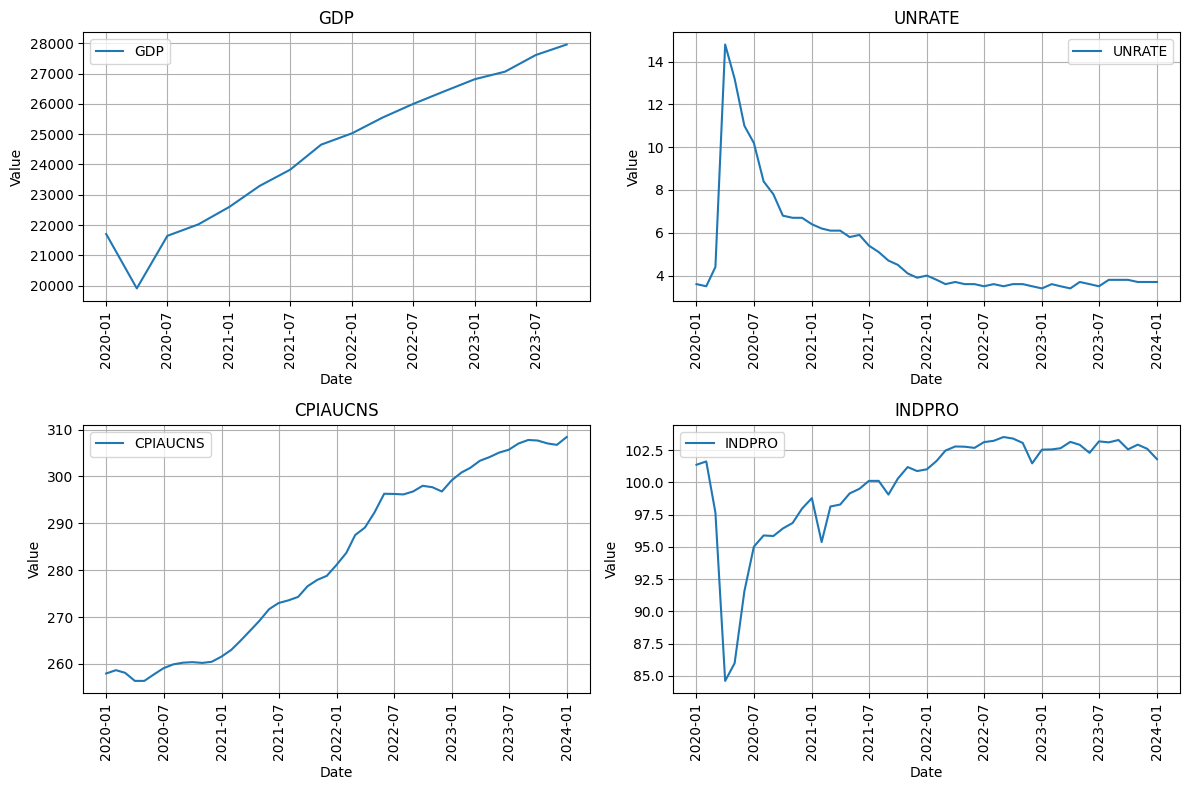

In [26]:
import matplotlib.pyplot as plt

# Plot economic indicators data in separate subplots
def plot_economic_data(data):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot each economic indicator in a separate subplot
    for i, column in enumerate(data.columns):
        row = i // 2
        col = i % 2
        if column == 'GDP':
            # Drop NaN values for GDP
            data_no_nan = data.dropna(subset=[column])
            axs[row, col].plot(data_no_nan.index, data_no_nan[column], label=column)
        else:
            axs[row, col].plot(data.index, data[column], label=column)
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel('Value')
        axs[row, col].legend()
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize economic indicators data in separate subplots
plot_economic_data(economic_df)


## Question 7. [Exploratory] Time-driven strategy description around earnings releases
Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

A **time-driven strategy** around earnings releases involves analyzing historical data and market trends to select a subset of companies of interest for potential trading or investment opportunities. Here's a high-level description of such a strategy:

1. Data Collection and Analysis:
    - Gather historical earnings release data for the past several quarters or years.
    - Collect stock price movements before and after earnings announcements for various companies.
    - Analyze the impact of earnings surprises (positive or negative) on stock prices and market volatility.

2. Identify Patterns and Trends:
    - Look for recurring patterns or trends in how stocks typically behave before and after earnings releases.
    - Determine which factors (e.g., earnings beat/miss, revenue growth, guidance, industry performance) tend to have the most significant impact on stock prices.

3. Define Selection Criteria:
    - Develop selection criteria based on the identified patterns and trends.
    - Criteria could include factors such as historical earnings performance, consistency in meeting or exceeding expectations, industry growth prospects, and market sentiment.

4. Future Events Data Analysis:
    - Utilize tools like Yahoo Finance's earnings calendar to identify upcoming earnings release dates for a specific period, e.g., the month of April.
    - Compare the upcoming earnings dates with the historical data to identify companies that meet the selection criteria and have upcoming earnings releases.

5. Subset Selection:
    - Narrow down the list of companies based on the defined selection criteria and the upcoming earnings dates.
    - Prioritize companies that have a track record of strong earnings performance and are expected to release earnings during the selected time frame.

6. Risk Management:
    - Assess the potential risks associated with each selected company, such as market conditions, industry-specific risks, and macroeconomic factors.
    - Implement risk management strategies to mitigate potential losses, such as setting stop-loss orders or diversifying the portfolio.

7. Monitoring and Adjustment:
    - Continuously monitor market developments, including any updates or changes to the selected companies' earnings release schedules.
    - Adjust the subset of companies as needed based on new information, market conditions, and changes in the selection criteria.

Overall, this time-driven strategy combines historical analysis with future events data to identify opportunities around earnings releases while also managing risks effectively. It emphasizes the importance of thorough research, pattern recognition, and proactive decision-making in selecting companies with the potential for favorable outcomes.